# Final Project : Klasifikasi Citra Kucing dan Anjing

#### Faturahman Yudanto | 16/400356/TK/45370


Pada final project ini, akan dilakukan proses klasifikasi citra (Image Classification) antara kucing dan anjing.

### Import Library
Langkah pertama yang dilakukan adalah mengimport library yang akan digunakan untuk proses ini.

In [1]:
from os import listdir
from numpy import asarray,save
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
from skimage import transform
import random

folder_train = 'cat-and-dog//training_set//training_set'
folder_test = 'cat-and-dog//test_set//test_set'


## Muat data dan prapemrosesan data

Proses selanjutnya adalah memuat data latih citra. Selain itu dilakukan juga beberapa langkah augmentasi data atau data augmentation(penambahan data latih citra). Proses data augmentation yang dilakukan antara lain menambahkan citra yang dicerminkan dan citra yang dirotasi dengan sudut antara -30 hingga 30 derajat secara acak

In [13]:
image_data_train = []
image_data_test = []
labels_train = []
labels_test = []

for files in listdir(folder_train+'//cats'):
    if '.jpg' in files:
        image = cv2.imread(folder_train+'//cats//'+files)
        image = cv2.resize(image,(90,90))
        img_flip = np.fliplr(image)
        img_rot = transform.rotate(image,random.uniform(-30,30))
        image = img_to_array(image)
        img_rot = img_to_array(img_rot)
        img_flip = img_to_array(img_flip)
        image_data_train.append(image)
        labels_train.append(1)
        image_data_train.append(img_rot)
        labels_train.append(1)
        #image_data_train.append(img_flip)
        #labels_train.append(1)

for files in listdir(folder_train+'//dogs'):
    if '.jpg' in files:
        image = cv2.imread(folder_train+'//dogs//'+files)
        image = cv2.resize(image,(90,90))
        img_flip = np.fliplr(image)
        img_rot = transform.rotate(image,random.uniform(-30,30))
        image = img_to_array(image)
        img_rot = img_to_array(img_rot)
        img_flip = img_to_array(img_flip)
        image_data_train.append(image)
        labels_train.append(0)
        image_data_train.append(img_rot)
        labels_train.append(0)
        #image_data_train.append(img_flip)
        #labels_train.append(0)

for files in listdir(folder_test+'//cats'):
    if '.jpg' in files:
        image = cv2.imread(folder_test+'//cats//'+files)
        image = cv2.resize(image,(90,90))
        image = img_to_array(image)
        image_data_test.append(image)
        labels_test.append(1)

for files in listdir(folder_test+'//dogs'):
    if '.jpg' in files:
        image = cv2.imread(folder_test+'//dogs//'+files)
        image = cv2.resize(image,(90,90))
        image = img_to_array(image)
        image_data_test.append(image)
        labels_test.append(0)



## Normalisasi data

Pada data citra dilakukan normalisasi data agar distribusi data seragam dan proses training model dapat berjalan dan konvergen lebih cepat

In [14]:
image_data_train = np.array(image_data_train,dtype='float16')/255.0
labels_train = np.array(labels_train)
image_data_test = np.array(image_data_test,dtype='float16')/255.0
labels_test = np.array(labels_test)

## Mengubah output kategorikal ke bentuk matriks

Luaran data latih ini berbentuk kategorikal, untuk itu data harus diubah ke bentuk matriks dengan menggunakan metode One-Hot Encoder

In [15]:
from tensorflow.keras.utils import to_categorical
labels_train = to_categorical(labels_train,num_classes=2)
labels_test = to_categorical(labels_test,num_classes=2)

Berikut merupakan contoh hasil pengubahan data kategorikal ke matriks

In [16]:
print("Matriks untuk label kucing = ",labels_train[0])
print("Matriks untuk label anjing = ",labels_train[len(labels_train)-2])

Matriks untuk label kucing =  [0. 1.]
Matriks untuk label anjing =  [1. 0.]


## Penyusunan Arsitektur Deep Learning

Arsitektur Deep Learning yang digunakan adalah dengan metode CNN. Arsitektur terdiri atas 5 layer konvolusi dan max pooling

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(90,90,3)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(2,activation='sigmoid'))
model.compile(optimizer= 'adam',loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 88, 88, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 44, 44, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 42, 42, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 21, 21, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 19, 19, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 32)         

## Training Data

Model deep learining dilatih menggunakan data latih sebanyak 24015 data dengan epoch sebanyak 15. Nilai batch size yang digunakan adalah 20

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor = "val_loss",patience = 2)

arch = model.fit(image_data_train,labels_train,epochs=20,validation_data = (image_data_test,labels_test), shuffle= True, batch_size = 20,callbacks = [es])

Train on 16010 samples, validate on 2023 samples
Epoch 1/20
16010/16010 [==============================] - 30s 2ms/sample - loss: 0.6927 - accuracy: 0.5106 - val_loss: 0.6910 - val_accuracy: 0.5403
Epoch 2/20
16010/16010 [==============================] - 23s 1ms/sample - loss: 0.6757 - accuracy: 0.5559 - val_loss: 0.6324 - val_accuracy: 0.6621
Epoch 3/20
16010/16010 [==============================] - 21s 1ms/sample - loss: 0.6516 - accuracy: 0.5879 - val_loss: 0.5996 - val_accuracy: 0.6960
Epoch 4/20
16010/16010 [==============================] - 21s 1ms/sample - loss: 0.6253 - accuracy: 0.6136 - val_loss: 0.5773 - val_accuracy: 0.7029
Epoch 5/20
16010/16010 [==============================] - 22s 1ms/sample - loss: 0.5957 - accuracy: 0.6307 - val_loss: 0.5291 - val_accuracy: 0.7467
Epoch 6/20
16010/16010 [==============================] - 23s 1ms/sample - loss: 0.5705 - accuracy: 0.6484 - val_loss: 0.4812 - val_accuracy: 0.7731
Epoch 7/20
16010/16010 [==============================] -

## Plot diagram akurasi dan loss pada tiap-tiap epoch

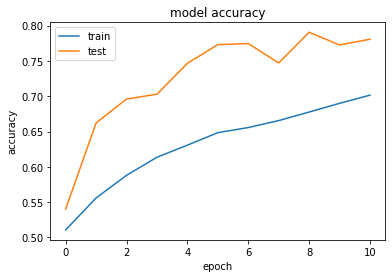

In [20]:
import matplotlib.pyplot as plt 
# summarize history for accuracy
plt.plot(arch.history['accuracy'])
plt.plot(arch.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


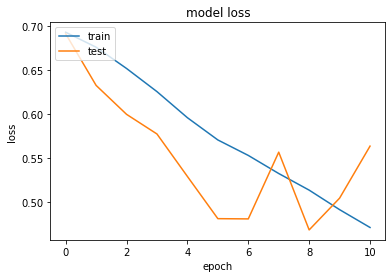

In [21]:
# summarize history for loss
plt.plot(arch.history['loss'])
plt.plot(arch.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Coba Prediksi

Berikut merupakan percobaan hasil prediksi salah satu data tes citra

Prediksi : 
anjing =  2.7512526e-06
kucing =  0.9999962


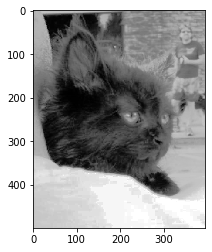

In [20]:
test_img = cv2.imread('cat-and-dog//test_set//test_set//cats//cat.4212.jpg')
#test_img = cv2.imread('Foto.jpg',0)#
test_img = cv2.equalizeHist(test_img)
test_imga = cv2.resize(test_img,(90,90))
test_imga = np.array(test_imga,dtype='float16')/255.0
test_imga = np.expand_dims(test_imga,axis=0)

prob = model.predict_proba(test_imga)
print('Prediksi : ')
print('anjing = ',prob[0][0])
print('kucing = ',prob[0][1])
plt.imshow(test_img,cmap='gray')